# Importing Libraries

In [1]:
# upload file and unzip it contents

from google.colab import files
uploaded = files.upload()

Saving bilder.zip to bilder.zip


In [2]:
!unzip /content/bilder.zip

Utdata för streaming har trunkerats till de sista 5000 raderna.
 extracting: images/validation/fear/9040.jpg  
 extracting: images/validation/fear/9101.jpg  
 extracting: images/validation/fear/911.jpg  
 extracting: images/validation/fear/9179.jpg  
 extracting: images/validation/fear/9205.jpg  
 extracting: images/validation/fear/9232.jpg  
 extracting: images/validation/fear/9251.jpg  
 extracting: images/validation/fear/9261.jpg  
 extracting: images/validation/fear/9281.jpg  
 extracting: images/validation/fear/9302.jpg  
 extracting: images/validation/fear/9333.jpg  
 extracting: images/validation/fear/9369.jpg  
 extracting: images/validation/fear/9370.jpg  
 extracting: images/validation/fear/9474.jpg  
 extracting: images/validation/fear/949.jpg  
 extracting: images/validation/fear/9602.jpg  
 extracting: images/validation/fear/9606.jpg  
 extracting: images/validation/fear/9842.jpg  
 extracting: images/validation/fear/9898.jpg  
   creating: images/validation/happy/
 extrac

In [3]:
# Import important libraries to use
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

# Displaying Images

In [4]:
# Adding variable picture_size 48 to standardize.
picture_size = 48
folder_path = "/content/images/"

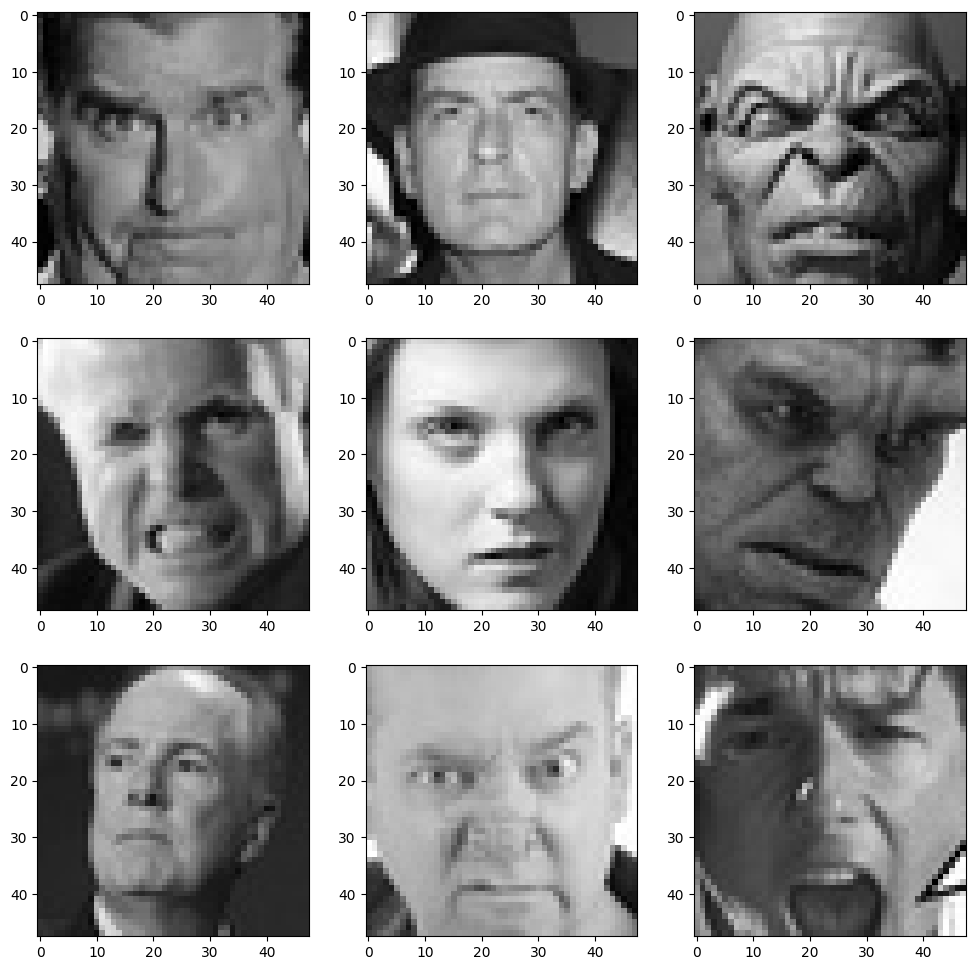

In [5]:
# Plotting some picture to see what we have to work with
# Change expression to see others
expression = 'angry'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

# Making Training and Validation Data

In [ ]:
# Issues with results from model. Only getting sad or angry. Tried to solve with data augmentation
# Still only getting sad or angry, added rescale and changed zoom, width and height range to 0.2 instead of 0.1
# Solved the issue


In [12]:
batch_size  = 128

datagen_train  = ImageDataGenerator(
    rescale=1/255,
    rotation_range=10,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)
datagen_val = ImageDataGenerator(
    rescale=1/255,
    rotation_range=10,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"

)

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Model Building

In [ ]:
# Building our model.
# Adding 4 cnn layers. Input shape only needed in first
# Dropout set to 25% to help prevent overfitting
# flatten so we can add fully connected layer to the cnn.


In [13]:
from keras.optimizers import Adam,SGD,RMSprop

no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3), padding = 'same', activation = 'relu', input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#flatten
model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))


opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_12 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 batch_normalization_13 (Ba  (None, 24, 24, 128)      

In [ ]:
# Tried with more and less layers, also tried changing dropout to 20% but made model worse.

# Fitting the Model with Training and Validation Data

In [ ]:
# Create a checkpoint to save model with the best weights on val_acc
# Adding early stopping where we check val_loss
# Adding reduce learningrate also monitoring val loss

In [15]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=5,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [16]:
history = model.fit(train_set,
                                epochs=epochs,
                                validation_data = test_set,
                                callbacks=callbacks_list
                                )

Epoch 1/48
226/226 [==============================] - ETA: 0s - loss: 2.4736 - accuracy: 0.1829
Epoch 1: val_accuracy improved from -inf to 0.16997, saving model to ./model.h5
226/226 [==============================] - 38s 155ms/step - loss: 2.4736 - accuracy: 0.1829 - val_loss: 2.0423 - val_accuracy: 0.1700 - lr: 1.0000e-04
Epoch 2/48


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


226/226 [==============================] - ETA: 0s - loss: 2.1973 - accuracy: 0.2014
Epoch 2: val_accuracy improved from 0.16997 to 0.18752, saving model to ./model.h5
226/226 [==============================] - 29s 127ms/step - loss: 2.1973 - accuracy: 0.2014 - val_loss: 2.0944 - val_accuracy: 0.1875 - lr: 1.0000e-04
Epoch 3/48
226/226 [==============================] - ETA: 0s - loss: 2.1009 - accuracy: 0.2113
Epoch 3: val_accuracy improved from 0.18752 to 0.25531, saving model to ./model.h5
226/226 [==============================] - 30s 131ms/step - loss: 2.1009 - accuracy: 0.2113 - val_loss: 1.8712 - val_accuracy: 0.2553 - lr: 1.0000e-04
Epoch 4/48
226/226 [==============================] - ETA: 0s - loss: 2.0360 - accuracy: 0.2205
Epoch 4: val_accuracy improved from 0.25531 to 0.26889, saving model to ./model.h5
226/226 [==============================] - 29s 128ms/step - loss: 2.0360 - accuracy: 0.2205 - val_loss: 1.8582 - val_accuracy: 0.2689 - lr: 1.0000e-04
Epoch 5/48
226/226 [=

# Plotting Accuracy & Loss

In [ ]:
# plotting train/val loss and train/val accuracy

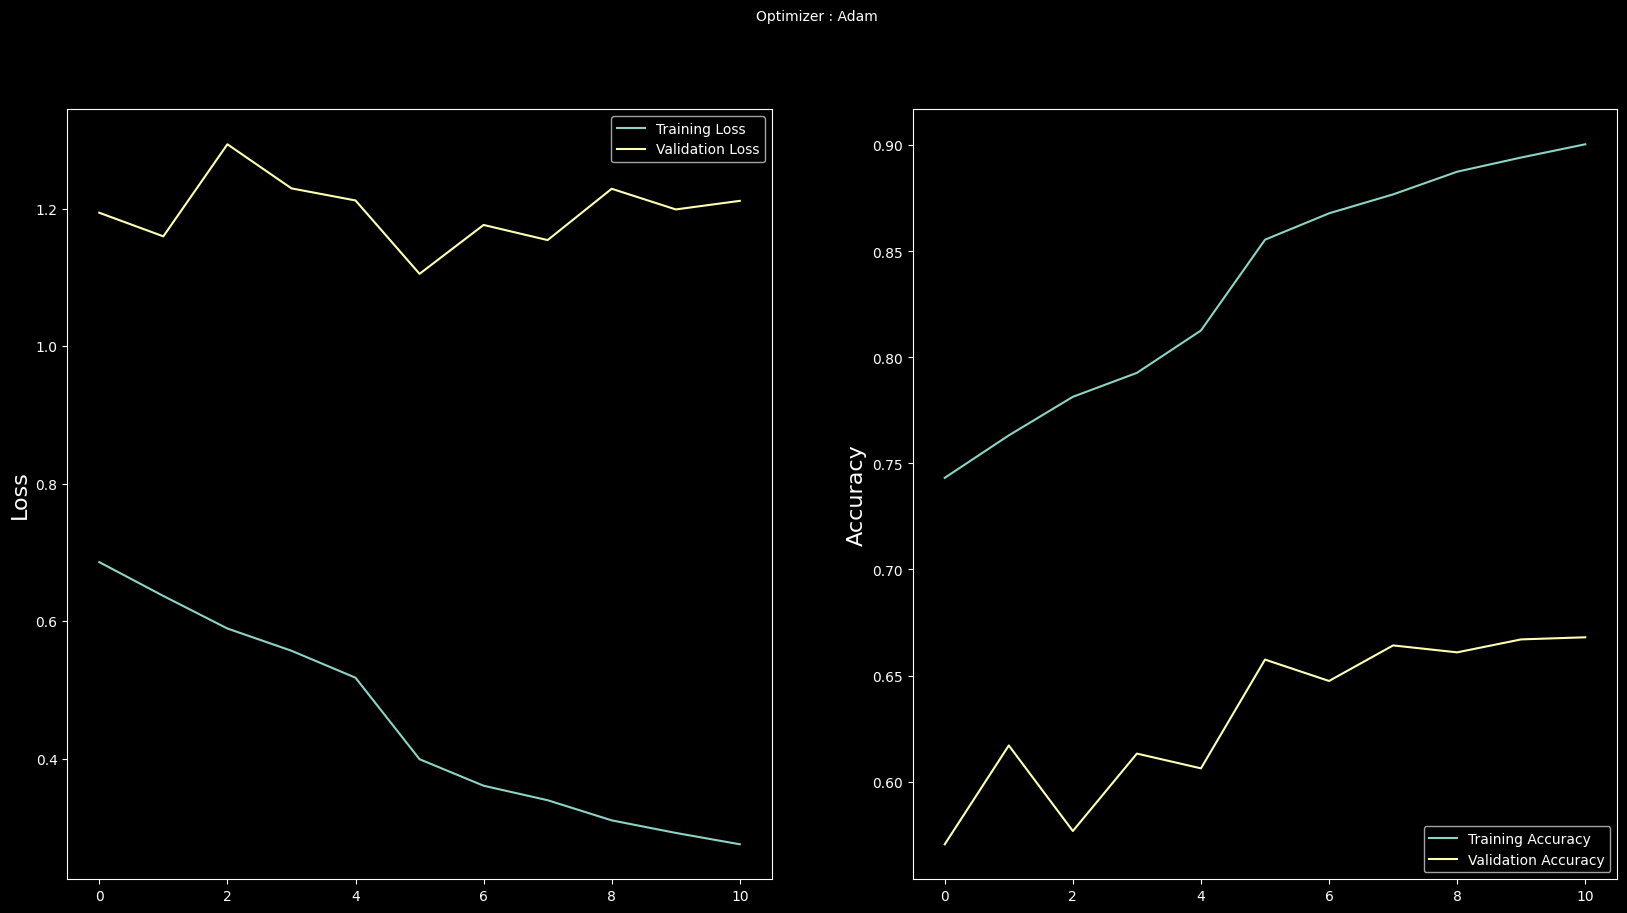

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model.save("model.h5")